# Exploratory data analysis- Retail

## Name: Ashwaq Khazi

## Perform Exploratory data analysis on dataset 'SampleSuperstore'

In [35]:
#import necessary librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
dt = pd.read_csv('SampleSuperstore.csv')
dt.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [37]:
dt.shape

(9994, 13)

In [38]:
dt.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [39]:
dt.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [88]:
dt.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

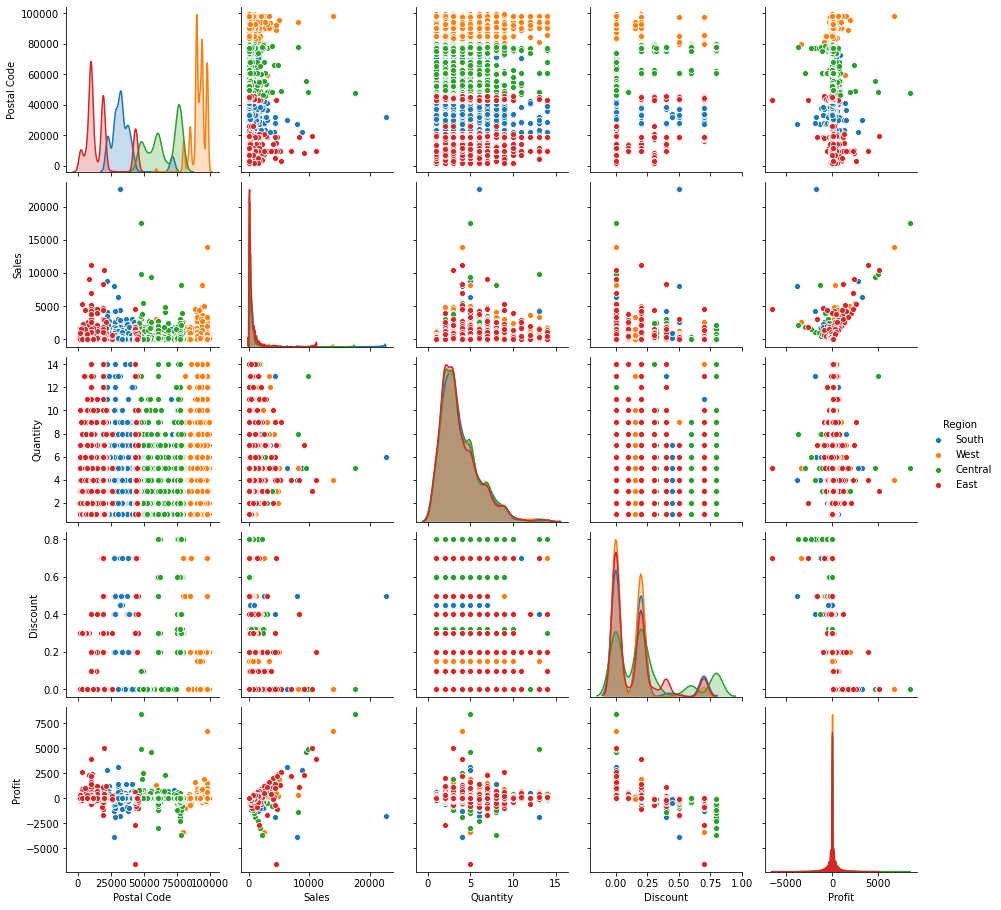

In [43]:
sns.pairplot(dt,hue='Region')

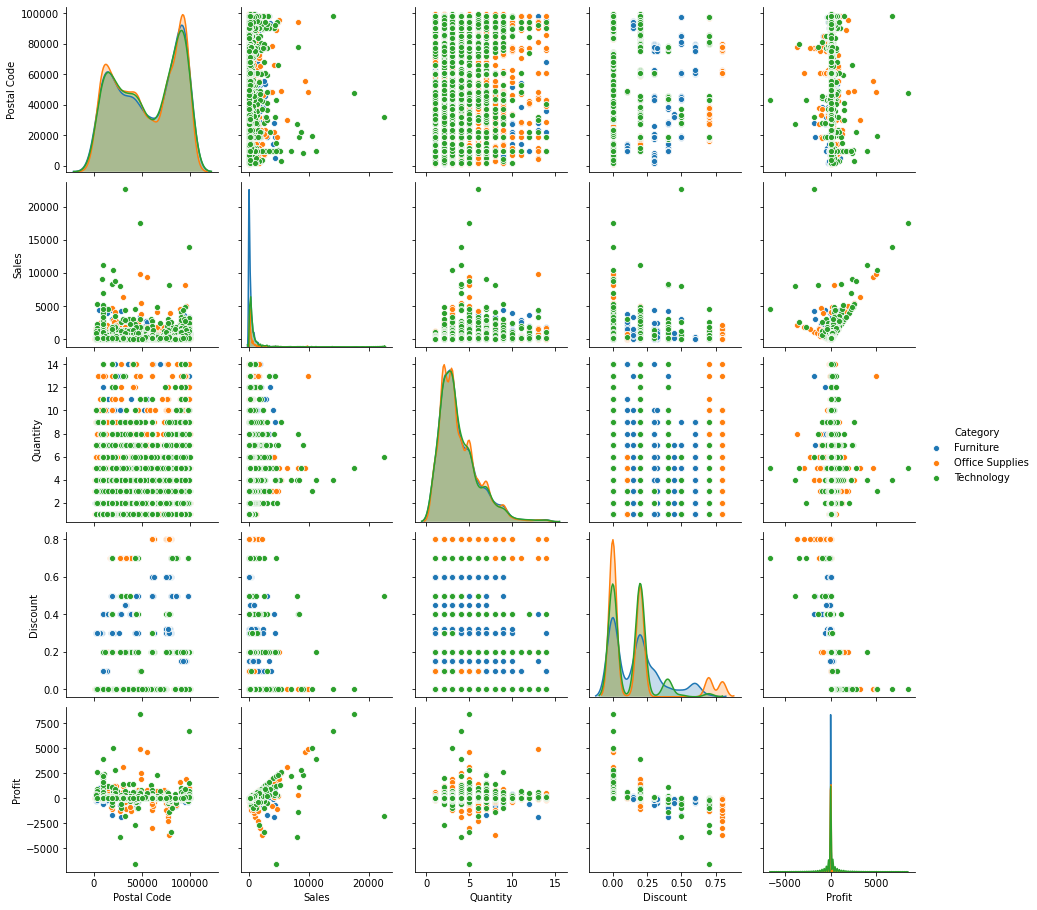

In [46]:
sns.pairplot(dt,hue='Category')

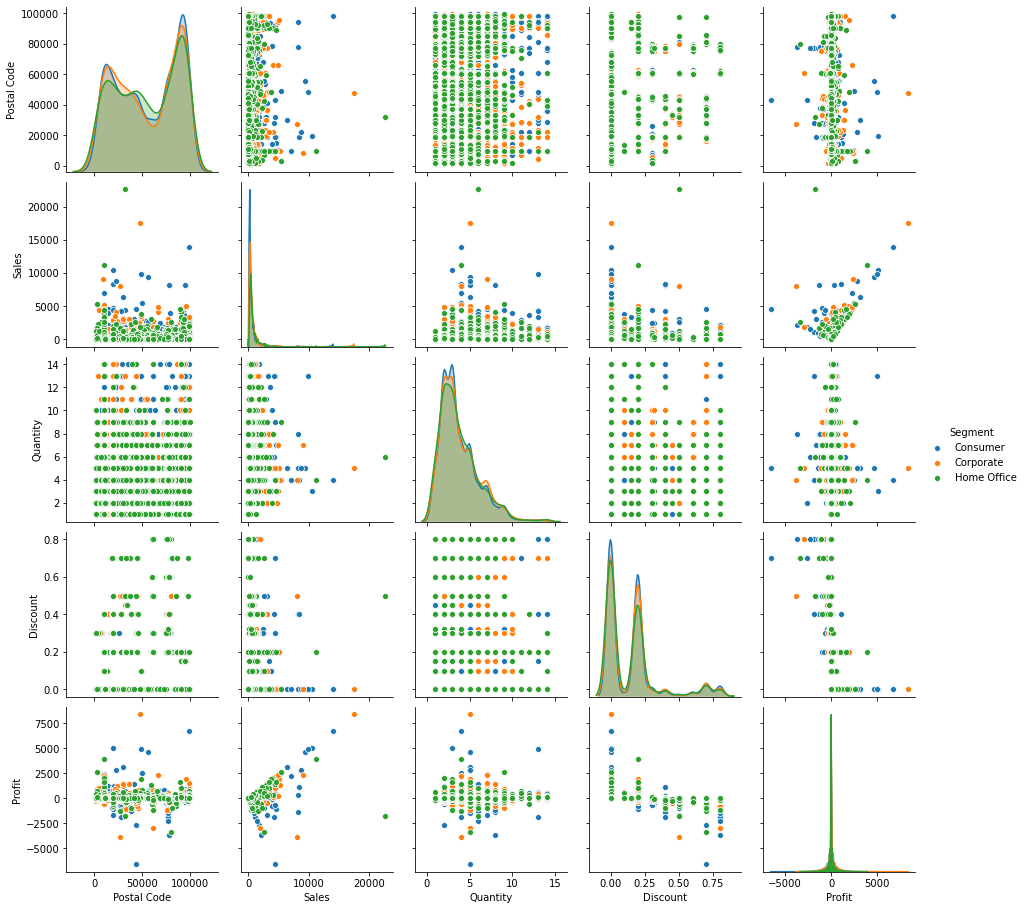

In [49]:
sns.pairplot(dt,hue='Segment')

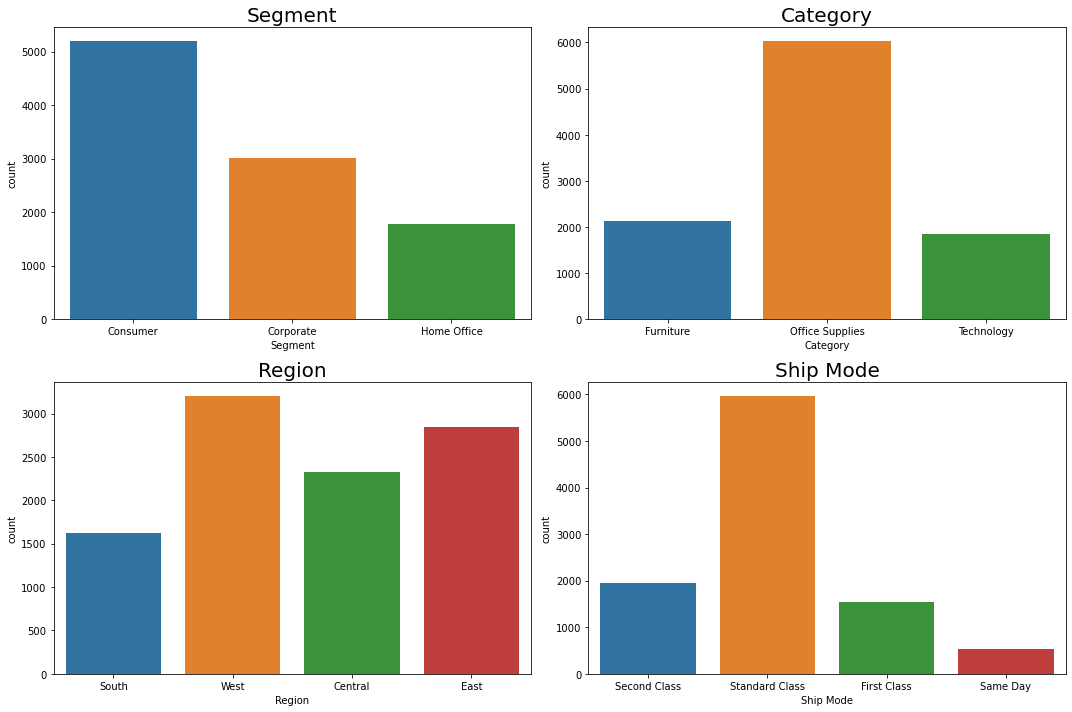

In [70]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10));
sns.countplot(dt['Segment'],ax=axs[0][0])
sns.countplot(dt['Category'],ax=axs[0][1])
sns.countplot(dt['Region'],ax=axs[1][0])
sns.countplot(dt['Ship Mode'],ax=axs[1][1])

axs[0][0].set_title('Segment',fontsize=20)
axs[0][1].set_title('Category',fontsize=20)
axs[1][0].set_title('Region',fontsize=20)
axs[1][1].set_title('Ship Mode',fontsize=20)

plt.tight_layout()

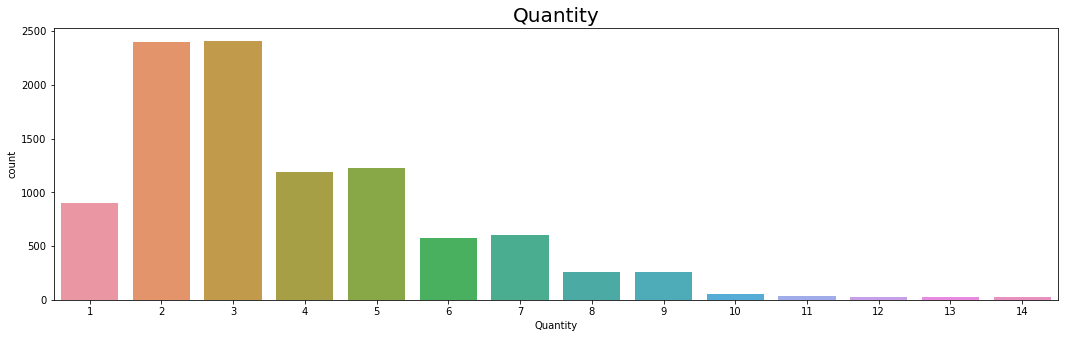

In [82]:
plt.figure(figsize=(18,5))
sns.countplot(dt['Quantity'])
plt.title('Quantity',fontsize=20)
plt.show()

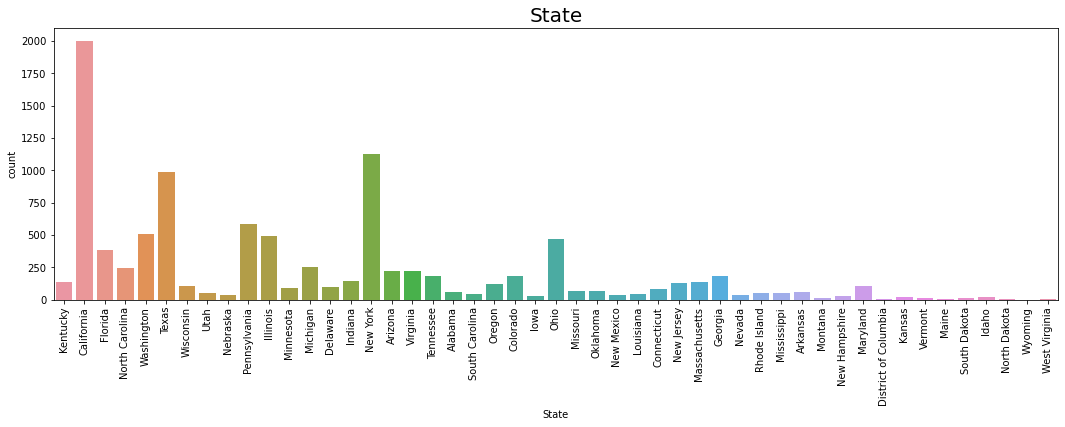

In [81]:
plt.figure(figsize=(18,5))
sns.countplot(dt['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)
plt.show()

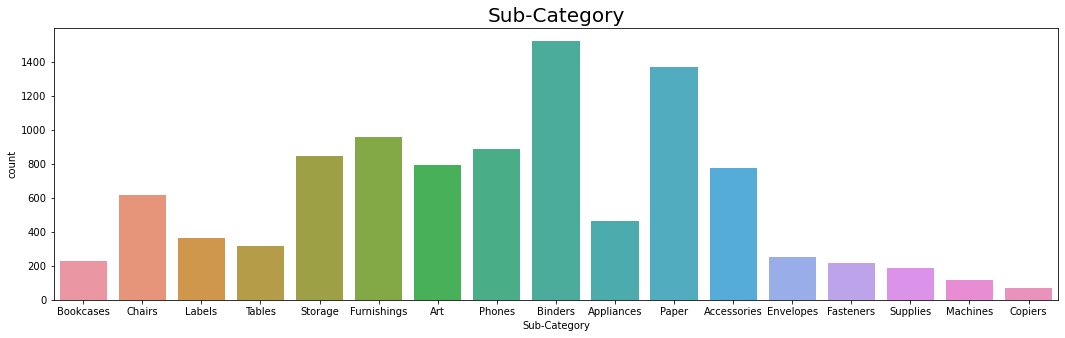

In [80]:
plt.figure(figsize=(18,5))
sns.countplot(dt['Sub-Category'])
plt.title('Sub-Category',fontsize=20)
plt.show()

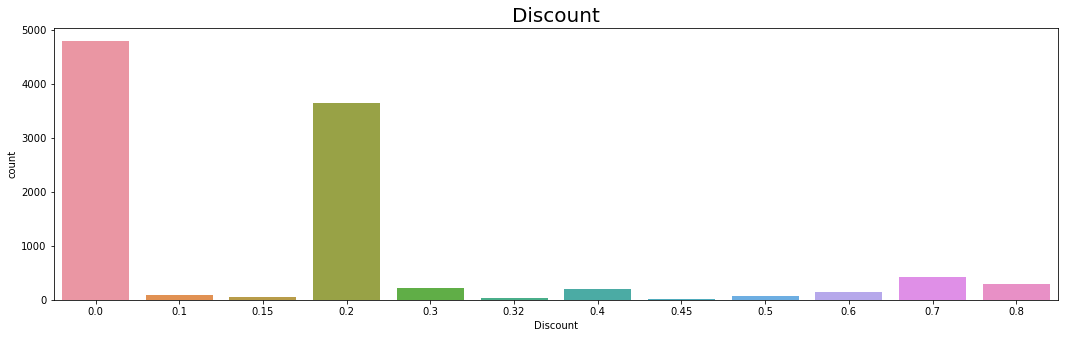

In [84]:
plt.figure(figsize=(18,5))
sns.countplot(dt['Discount'])
plt.title('Discount',fontsize=20)
plt.show()

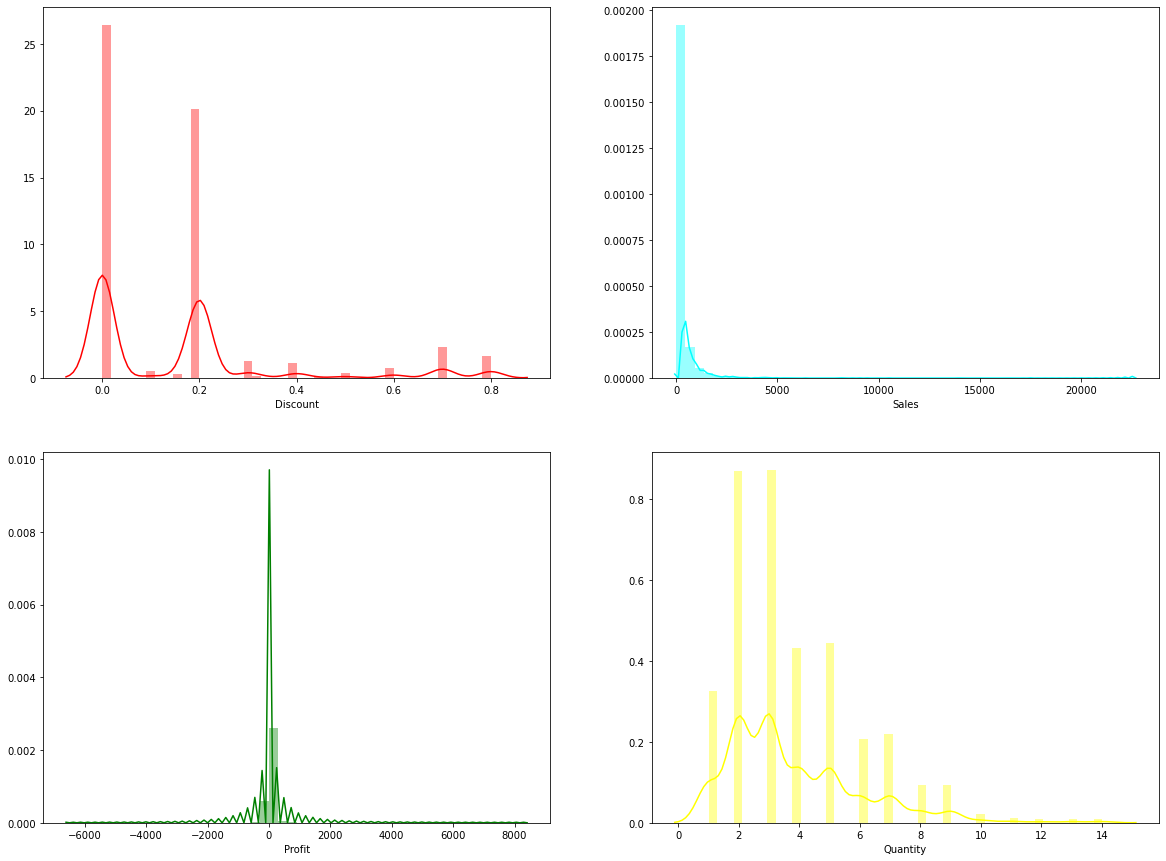

In [98]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
sns.distplot(dt['Discount'],color='red',ax=axs[0][0])
sns.distplot(dt['Sales'],color='cyan',ax=axs[0][1])
sns.distplot(dt['Profit'],color='green',ax=axs[1][0])
sns.distplot(dt['Quantity'],color='yellow',ax=axs[1][1])
plt.show()

# Statewise analysis

In [102]:
dt1 = dt['State'].value_counts()
print(dt1)

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

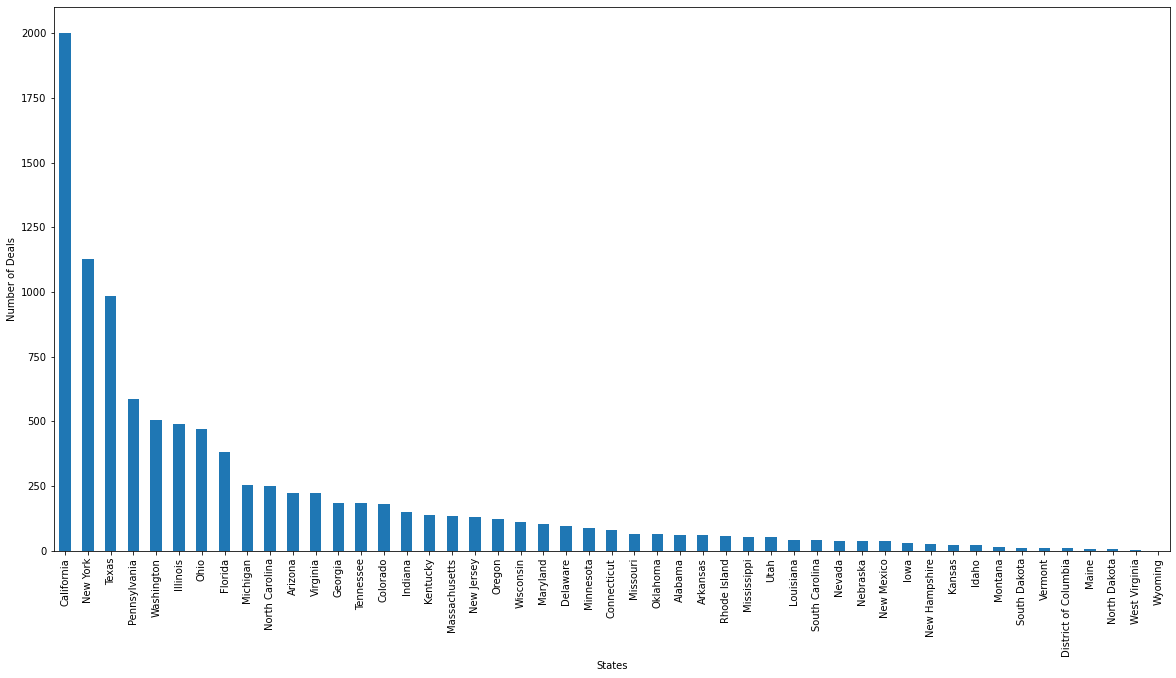

In [106]:
dt1.plot(kind='bar', figsize=(20, 10))
plt.xlabel('States')
plt.ylabel('Number of Deals')
plt.show()

In [131]:
print("The average number of deals per state is {}".format(round(dt1.mean())))

The average number of deals per state is 204


In [136]:
dt_state = dt.groupby(['State'])[['Sales','Discount','Profit']].mean()
print(dt_state)

                            Sales  Discount      Profit
State                                                  
Alabama                319.846557  0.000000   94.865989
Arizona                157.508933  0.303571  -15.303235
Arkansas               194.635500  0.000000   66.811452
California             228.729451  0.072764   38.171608
Colorado               176.418231  0.316484  -35.867351
Connecticut            163.223866  0.007317   42.823071
Delaware               285.948635  0.006250  103.930988
District of Columbia   286.502000  0.000000  105.958930
Florida                233.612815  0.299347   -8.875461
Georgia                266.825217  0.000000   88.315453
Idaho                  208.689810  0.085714   39.367767
Illinois               162.939230  0.390041  -25.625787
Indiana                359.431946  0.000000  123.375411
Iowa                   152.658667  0.000000   39.460397
Kansas                 121.429583  0.000000   34.851813
Kentucky               263.250000  0.000000   80

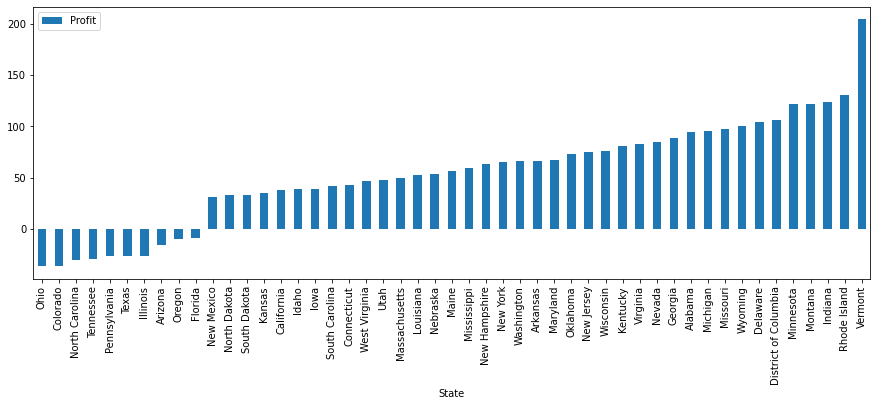

In [148]:
dt_s1 = dt_state.sort_values('Profit')
dt_s1[['Profit']].plot(kind='bar',figsize=(15,5))
plt.title('Statewise analysis of Profit')

Text(0.5, 1.0, 'Statewise analysis of Discount')

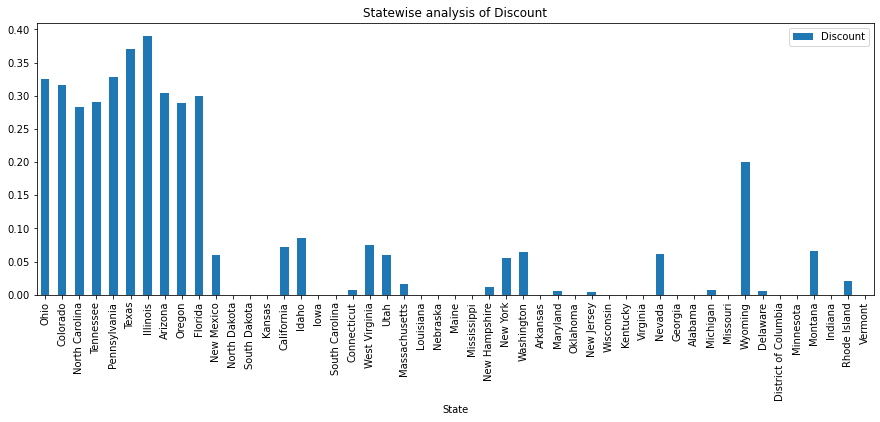

In [151]:
dt_s1[['Discount']].plot(kind='bar',figsize=(15,5))
plt.title('Statewise analysis of Discount')

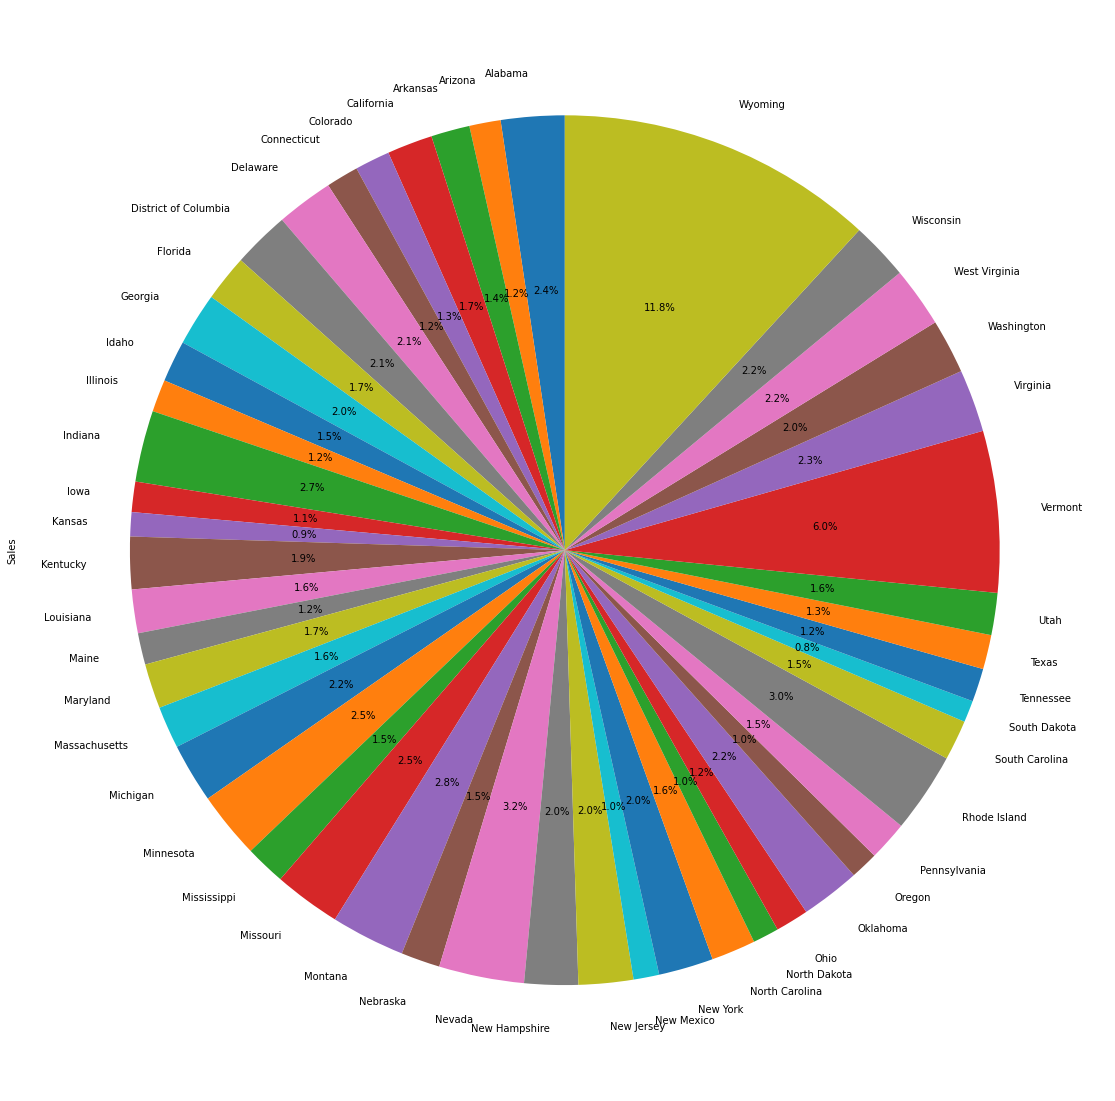

In [162]:
dt_state['Sales'].plot(kind='pie',figsize=(20,20),autopct='%1.1f%%',startangle=90)

# citywise analysis

In [141]:
dt2 = dt['City'].value_counts()
dt3 = dt2.head(50)

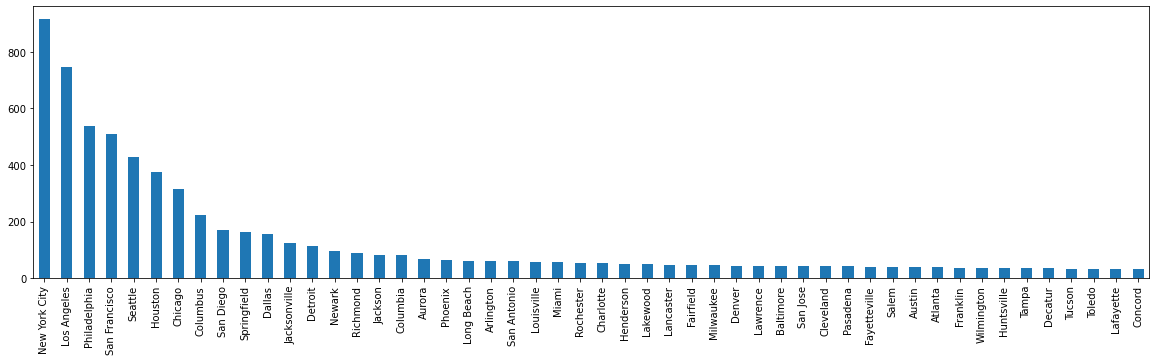

In [129]:
dt3.plot(kind='bar',figsize=(20,5))


In [130]:
print("The average number of deals per City is {}".format(round(dt2.mean())))

The average number of deals per City is 19


In [178]:
dt_city = dt.groupby(['City'])[['Sales','Discount','Profit']].mean()
dt_city = dt_city.sort_values('Profit')
dt_city.head(50)

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052
Clarksville,316.818571,0.271429,-150.764743
Medina,275.302444,0.433333,-149.227178
Burlington,866.723280,0.136000,-144.915088
San Antonio,370.229288,0.383051,-123.712715


Text(0.5, 1.0, 'Citywise analysis of Profit')

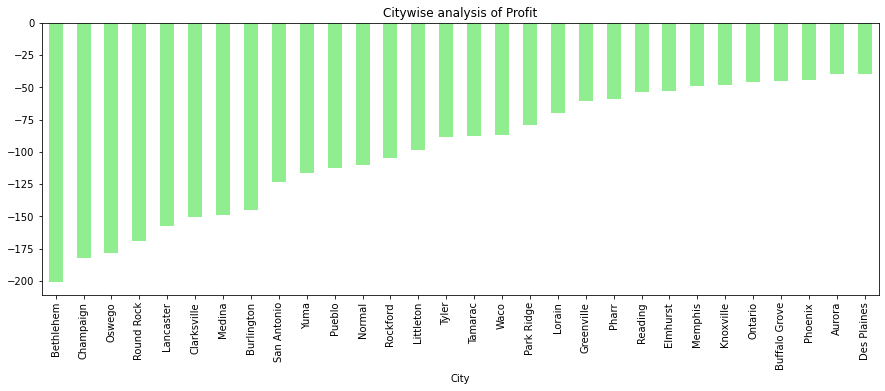

In [188]:
dt_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color='lightgreen')
plt.title('Citywise analysis of Profit')

Text(0.5, 1.0, 'Citywise analysis of Profit')

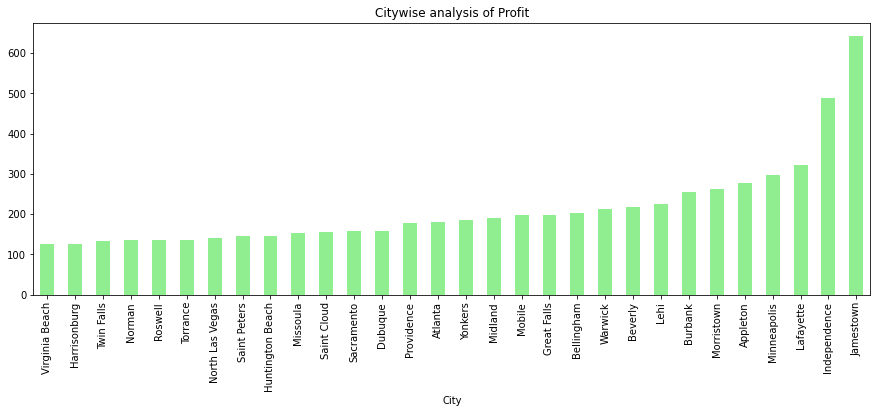

In [180]:
dt_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color='lightgreen')
plt.title('Citywise analysis of Profit')

# Quantitywise analysis on sales, profit and discount

In [194]:
dt_qnt = dt.groupby(['Quantity'])[['Sales','Discount','Profit']].mean()
dt_qnt.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


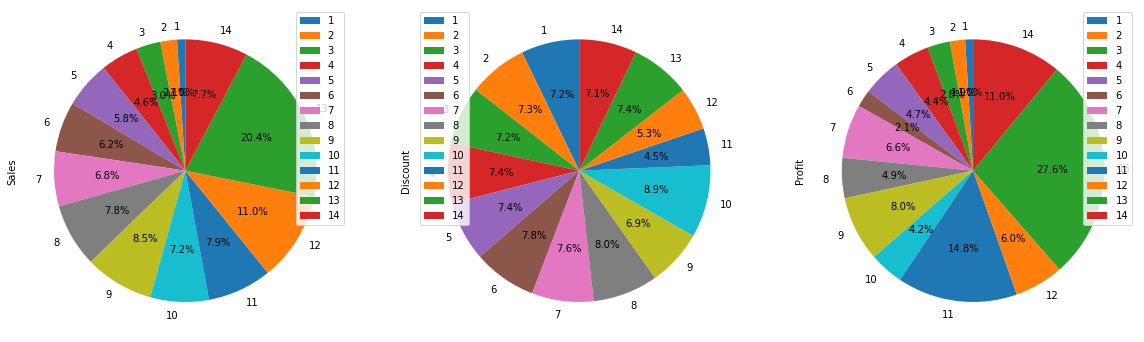

In [218]:
dt_qnt.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(20,20),startangle=90)
plt.show()

In [209]:
#Regionwise analysis on sales, Profit and Discount 

In [213]:
dt_reg = dt.groupby(['Region'])[['Sales','Discount','Profit']].mean()
dt_reg

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


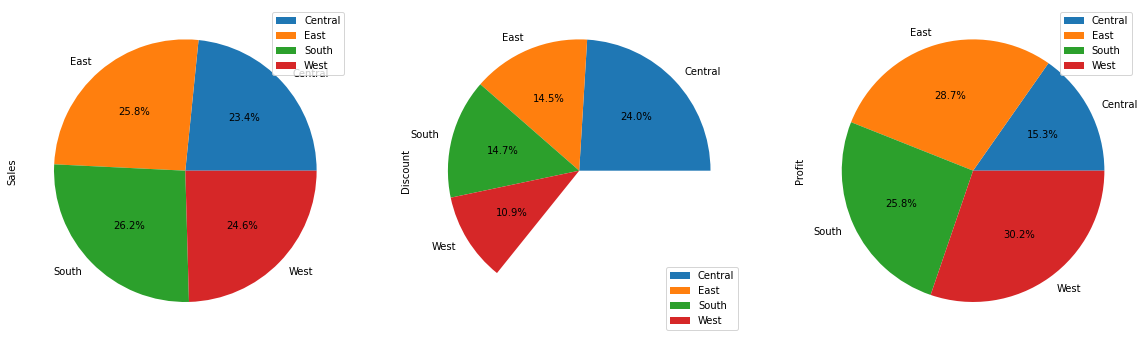

In [221]:
dt_reg.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%')
plt.show()

# shipmentmodewise analysis on sales, discount and profit

In [226]:
dt_ship = dt.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
dt_ship

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


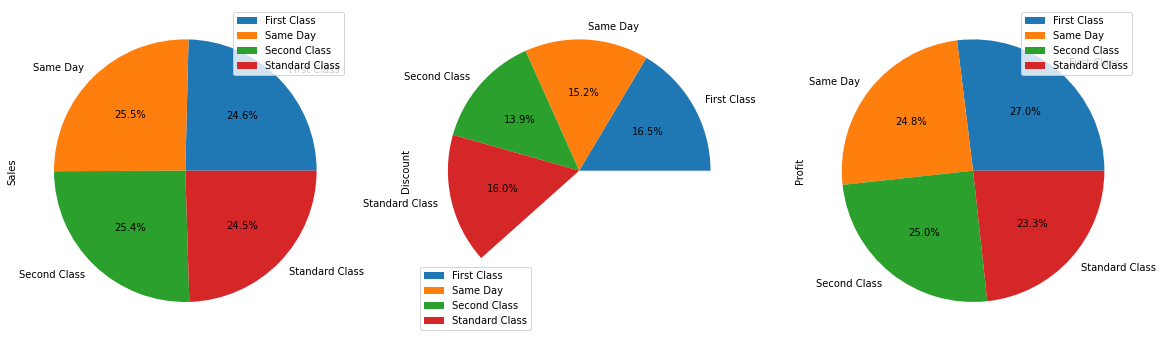

In [228]:
dt_ship.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%')
plt.show()

# Categorywise analysis

In [231]:
dt_cat = dt.groupby(['Category'])[['Sales','Discount','Profit']].mean()
dt_cat

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


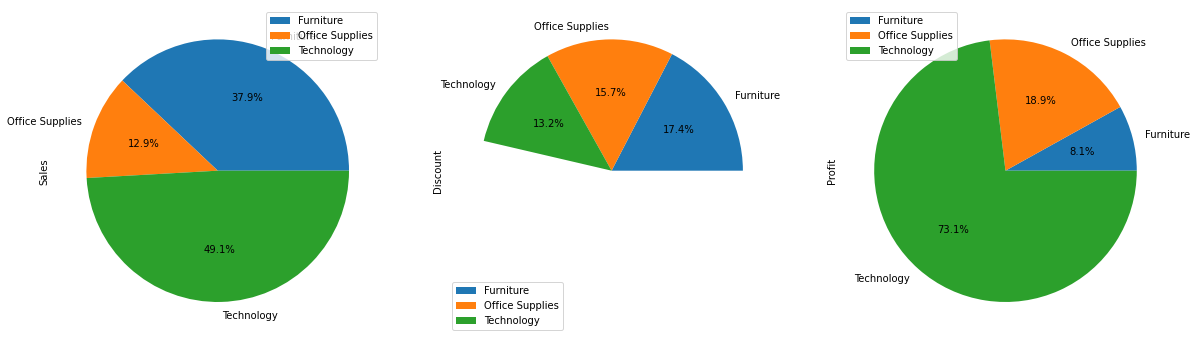

In [233]:
dt_cat.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%')
plt.show()

# subcategorywise analysis

In [237]:
dt_subcat = dt.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean()
dt_subcat

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


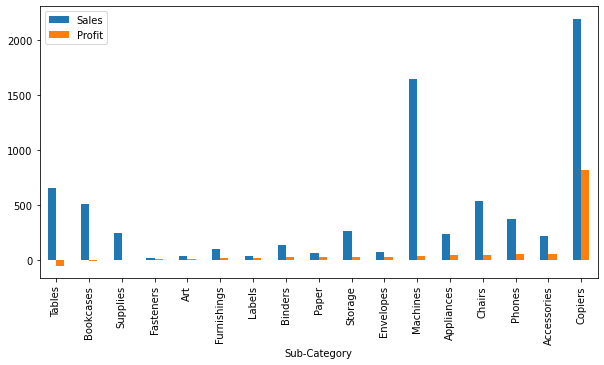

In [262]:
dt_subcat.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',figsize=(10,5))

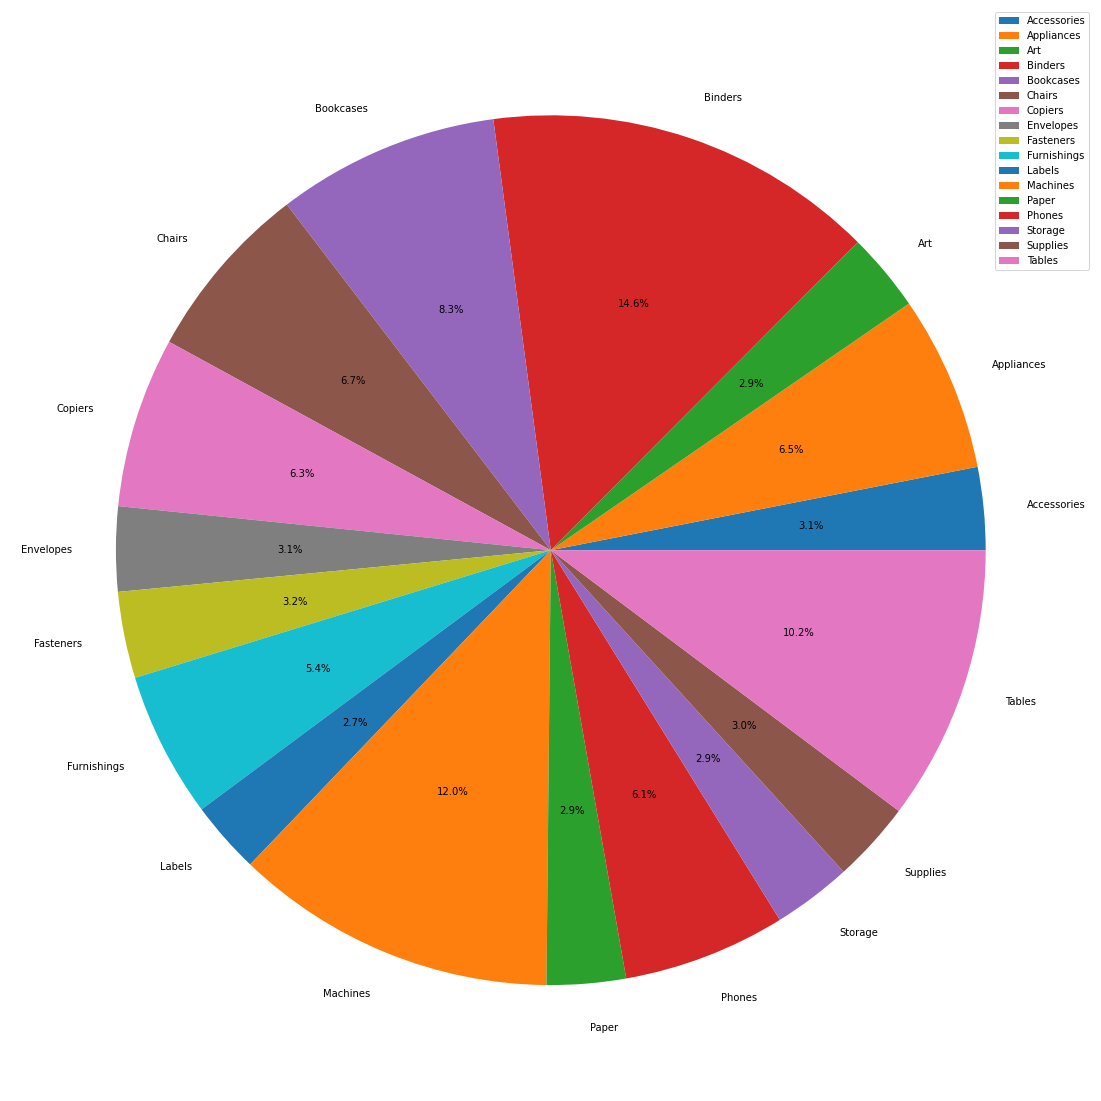

In [257]:
plt.figure(figsize=(20,20))
plt.pie(dt_subcat['Discount'],labels= dt_subcat.index, autopct='%1.1f%%')
plt.legend()
plt.xticks(rotation=90)
plt.show()

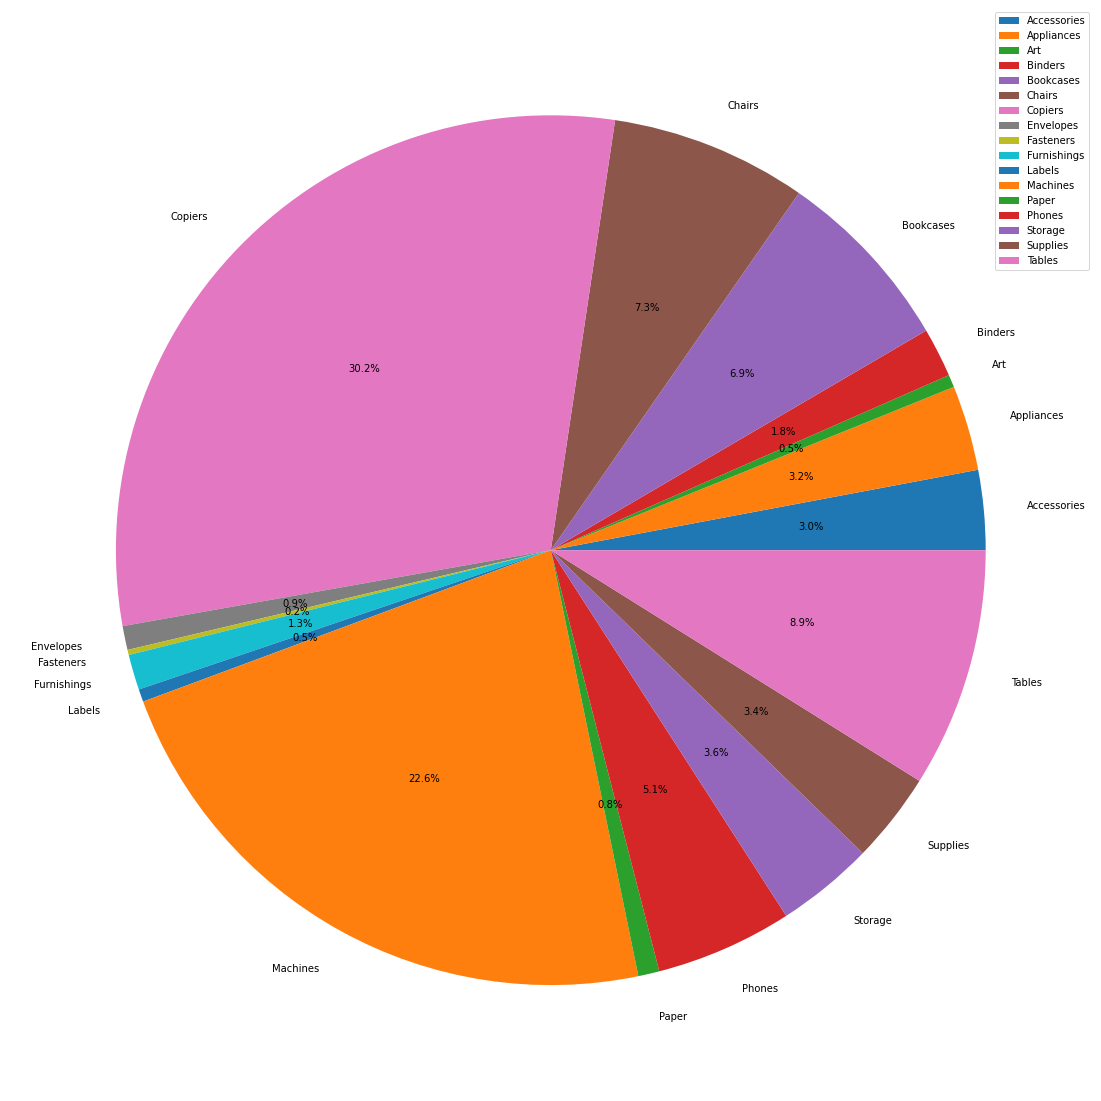

In [259]:
plt.figure(figsize=(20,20))
plt.pie(dt_subcat['Sales'],labels= dt_subcat.index, autopct='%1.1f%%')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [263]:
#RESULT AND CONCLUSION
#Profit is more than that of sale but there are some areas where profit could be increased.
#Profit and Discount is high in First Class
#Sales is high for Same day ship
#Sub-category: Copier: High Profit & sales
#Sub-category: Binders , Machines and then tables have high Discount.
#Category: Maximun sales and Profit obtain in Technology.
#Category: Minimun profit obtain in Furniture
#State: Vermont: Highest Profit
#State: Ohio: Lowest Profit
#Segment: Home-office: High Profit & sales
#Here is top 3 city where deals are Highest.
#New York City
#Los Angeles
#Philadelphia
#Sales and Profit are Moderately Correlated.
#Quantity and Profit are less Moderately Correlated.
#Discount and Profit are Negatively Correlated
#Here is top 3 state where deals are Highest.
#Califonia
#New York
#Texas
#Wyoming : Lowest Number of deal,Highest amount of sales= Wyoming(11.8%)
#Lowest amount of sales= South Dakota(0.8%)